In [53]:
%%html
<style type='text/css'>
.CodeMirror{
font-size: 14px;
</style>

In [54]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import tikzplotlib
from os import path

import matplotlib.pyplot as plt
%matplotlib inline

folder = 'to_load/'

In [55]:
simulation_type = 'epynet'
simulation_folder = 'good_90_eps_attacks'

if path.exists(folder + '/' + simulation_folder + '/PLC2_altered-0.csv'):
    simulation_type = 'attacks'

In [56]:
filename = simulation_folder + '/dataset'

with open(folder + filename, mode='rb') as file:
    res = pickle.load(file)

In [57]:
def print_results_summary(results):
    """
    Print together the principal saved results
    """
    print("---------------------------------------------------------------------------------")
    print("RESULTS SUMMARY:")
    print("---------------------------------------------------------------------------------")
    seeds = [results['eval'][i]['seed'] for i in range(len(results['eval']))]
    DSRs = [results['eval'][i]['dsr'] for i in range(len(results['eval']))]
    updates = [results['eval'][i]['updates'] for i in range(len(results['eval']))]
               
    print("SEEDS: ", seeds)
    print("DSRs: ", DSRs)
    print("UPDATES: ", updates)    
               

def print_attacks(attacks):
    """
    Handle the format of attacks prints
    """
    for i, attack in enumerate(attacks):
        print("Episode {}:".format(i))
        if attack:
            for sub in attack:
                print('\tname: ', sub['name'])
                print("\ttype: ", sub['type'])
                print("\ttarget: ", sub['target'])
                print("\ttrigger", sub['trigger'])
                print("\ttags", sub['tags'])        
        else:
            print("\t[]")

In [58]:
print_results_summary(res)

---------------------------------------------------------------------------------
RESULTS SUMMARY:
---------------------------------------------------------------------------------
SEEDS:  [0, 1, 2, 3]
DSRs:  [0.8742303376230803, 0.8712275016585128, 0.8727820041808007, 0.868427739714518]
UPDATES:  [410, 454, 406, 418]


In [59]:
model = res['eval']

In [60]:
model

[{'dsr': 0.8742303376230803,
  'updates': 410,
  'seed': 0,
  'dataset':       timestamp                                      current_state action  \
  0             0               [3.051, 3.051, 0.0, 0.09507826, 0.0]    [0]   
  1           300  [2.9465992, 2.9287317, 63.262253, 0.09507826, ...    [1]   
  2           600  [3.2971315, 3.1518629, 81.628075, 0.09507826, ...    [1]   
  3           900  [3.6407456, 3.3768048, 81.69845, 0.09507826, 0.0]    [1]   
  4          1200   [3.977657, 3.6033607, 81.76857, 0.09507826, 0.0]    [3]   
  ...         ...                                                ...    ...   
  2017     603600  [7.4223323, 6.287934, 86.284706, 0.20911819, 0.0]    [0]   
  2018     603900  [7.1783166, 6.1561236, 66.643906, 0.20911819, ...    [0]   
  2019     604200   [6.9413066, 6.0173073, 66.4692, 0.20911819, 0.0]    [0]   
  2020     604500   [6.7103667, 5.872421, 66.29234, 0.20911819, 0.0]    [0]   
  2021     604800  [6.4847846, 5.7221766, 66.11415, 0.095078

## Using DQN dataset only: observation and action space variables

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


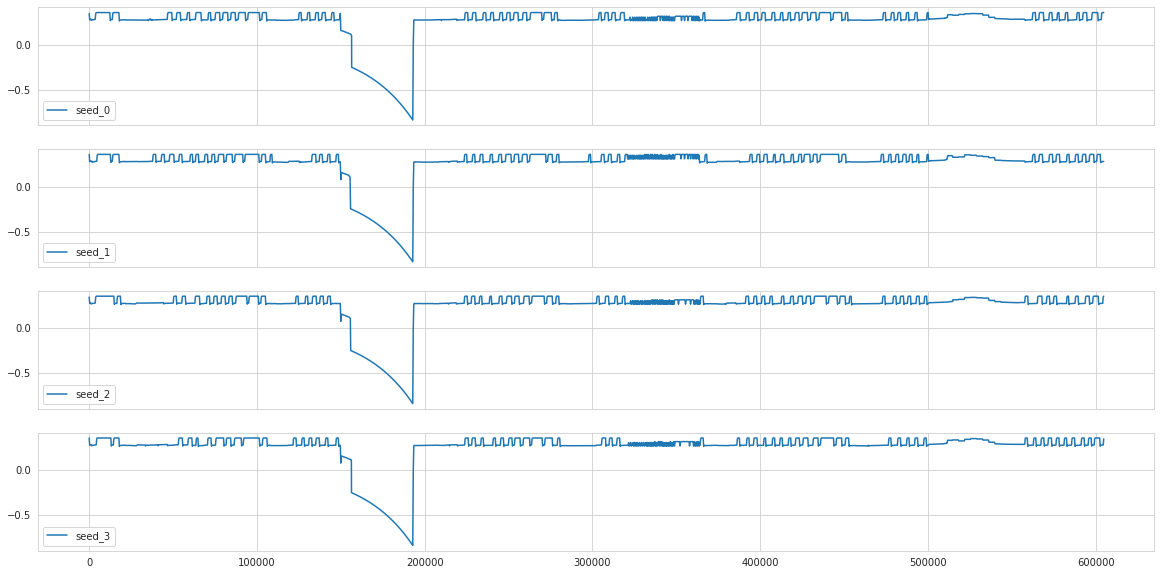

In [61]:
# IMMEDIATE REWARD

model = res['eval']

fig, axs = plt.subplots(4, 1, figsize=(20,10), sharex=True)

for seed in range(len(model)):
    rewards = model[seed]['dataset']['reward']
    xvalues = model[seed]['dataset']['timestamp']
    
    axs[seed].plot(xvalues, rewards, label="seed_" + str(seed))
    axs[seed].legend()

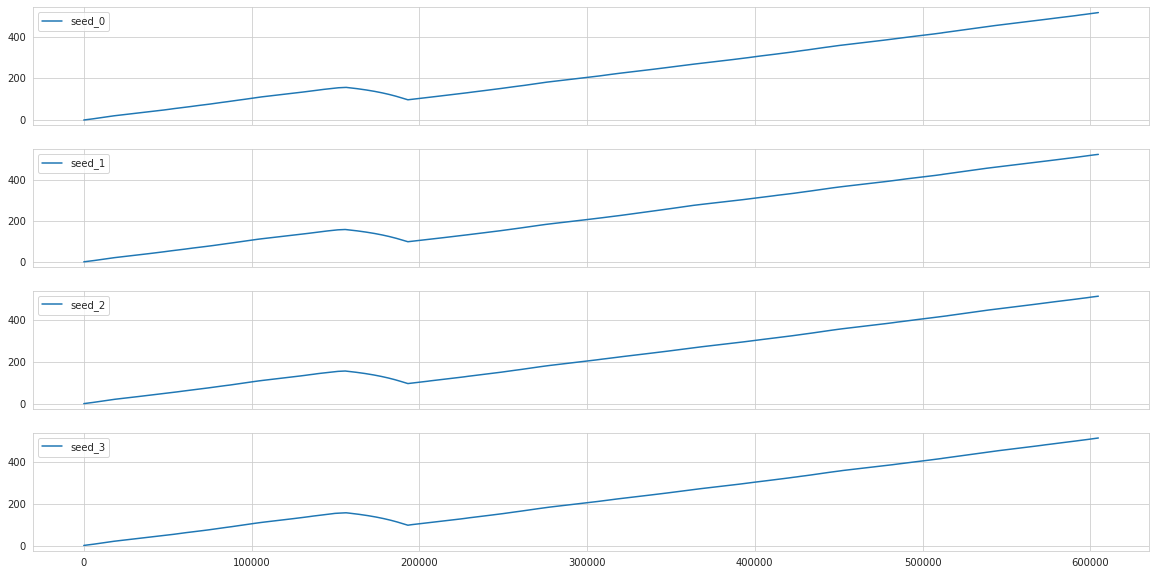

In [62]:
# CUMULATIVE REWARD

fig, axs = plt.subplots(4, 1, figsize=(20,10), sharex=True)

for seed in range(len(model)):
    rewards = model[seed]['dataset']['reward']
    cum_reward_list = []
    cum_reward = 0
    for rew in rewards:
        cum_reward += rew
        cum_reward_list.append(cum_reward)
        
    xvalues = model[seed]['dataset']['timestamp']
    
    axs[seed].plot(xvalues, cum_reward_list, label='seed_' + str(seed))
    axs[seed].legend()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


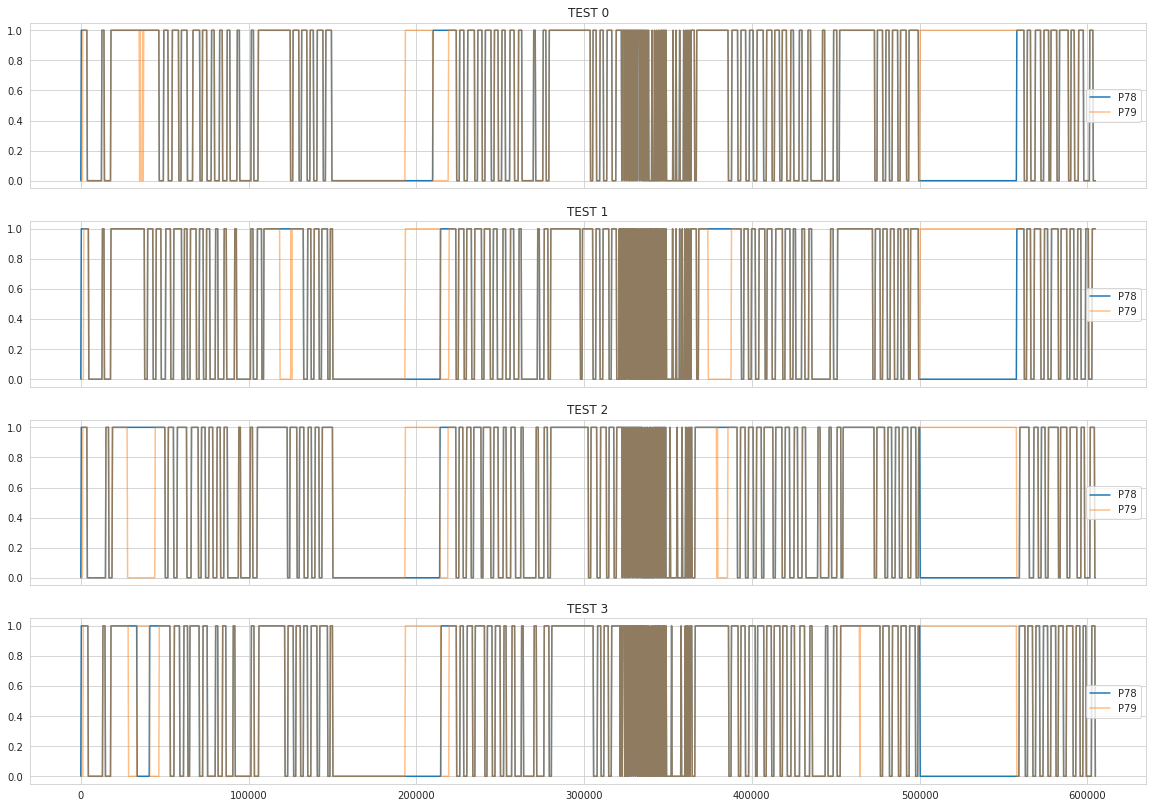

In [63]:
# PUMPS ACTIVATION

fig, axs = plt.subplots(4, 1, figsize=(20,14), sharex=True)

for seed in range(len(model)):
    bin_actions = ['{0:0{width}b}'.format(action[0], width=2) for action in model[seed]['dataset']['action']] 
    p78 = [int(action[1]) for action in bin_actions]
    p79 = [int(action[0]) for action in bin_actions]
    xvalues = model[seed]['dataset']['timestamp']
    
    axs[seed].plot(xvalues, p78)
    axs[seed].plot(xvalues, p79, alpha=0.5)
    axs[seed].legend(('P78', 'P79'))
    axs[seed].set_title('TEST ' + str(seed))

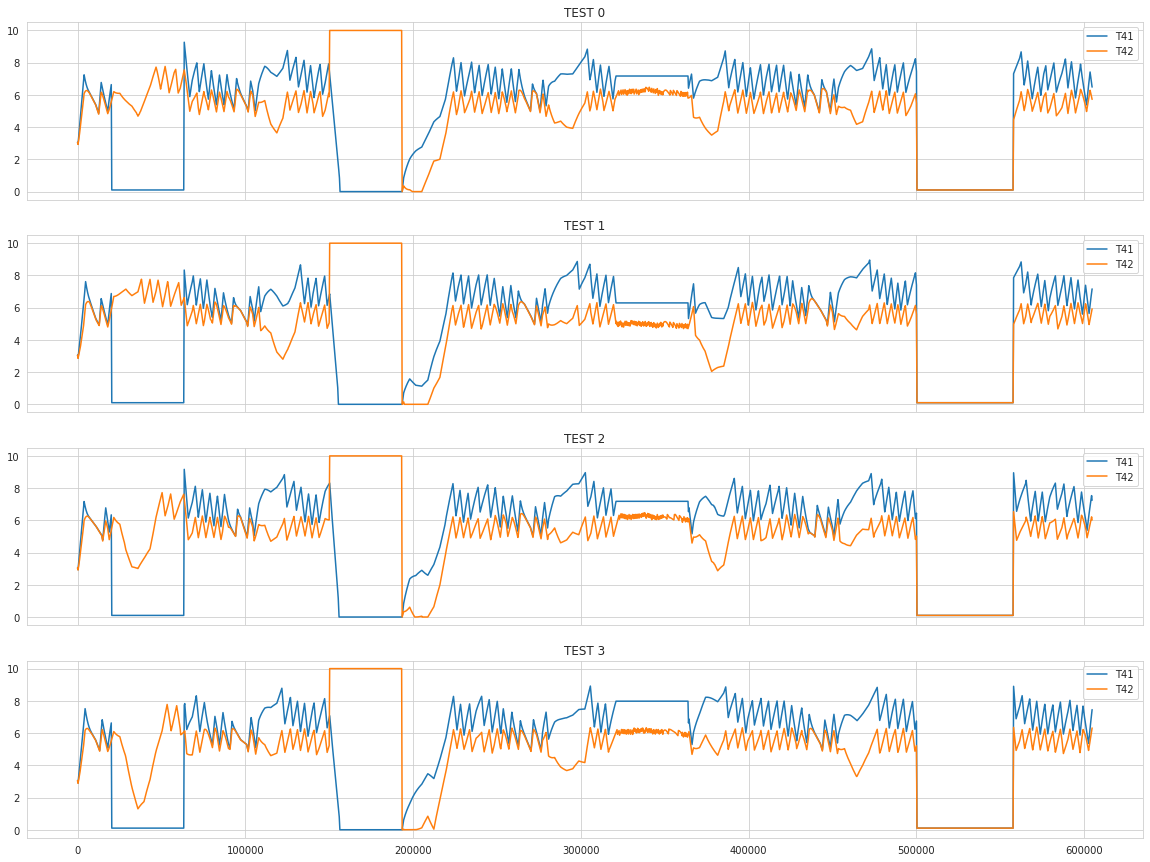

In [64]:
# TANK LEVELS

fig, axs = plt.subplots(4, 1, figsize=(20,15), sharex=True)

for seed in range(len(model)):
    T41_level = [model[seed]['dataset']['current_state'][i][0] for i in range(len(model[seed]['dataset']))]
    T42_level = [model[seed]['dataset']['current_state'][i][1] for i in range(len(model[seed]['dataset']))]
    xvalues = model[seed]['dataset']['timestamp']
    
    axs[seed].plot(xvalues, T41_level)
    axs[seed].plot(xvalues, T42_level)
    
    axs[seed].legend(('T41', 'T42'))
    axs[seed].set_title('TEST ' + str(seed))

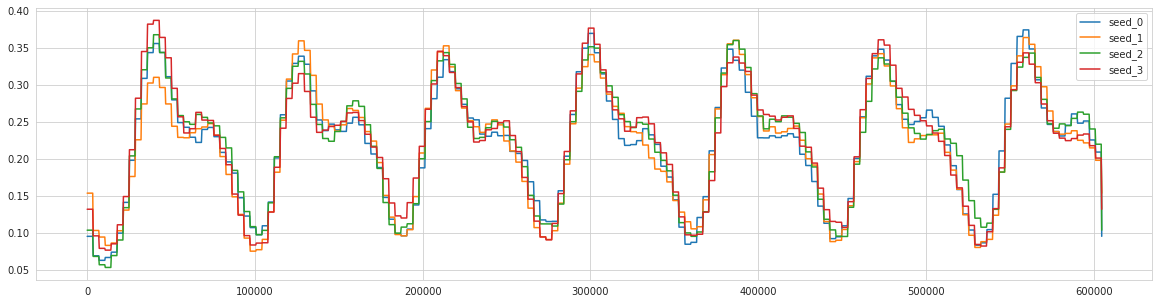

In [65]:
# Moving average of test demand patterns

fig, ax = plt.subplots(figsize=(20,5), sharex=True)
ax.plot(model[0]['dataset']['timestamp'], [model[0]['dataset']['current_state'][i][3] for i in range(len(model[0]['dataset']))])
ax.plot(model[1]['dataset']['timestamp'], [model[1]['dataset']['current_state'][i][3] for i in range(len(model[1]['dataset']))])
ax.plot(model[2]['dataset']['timestamp'], [model[2]['dataset']['current_state'][i][3] for i in range(len(model[2]['dataset']))])
ax.plot(model[3]['dataset']['timestamp'], [model[3]['dataset']['current_state'][i][3] for i in range(len(model[3]['dataset']))])
    
ax.legend(('seed_0', 'seed_1', 'seed_2', 'seed_3'))

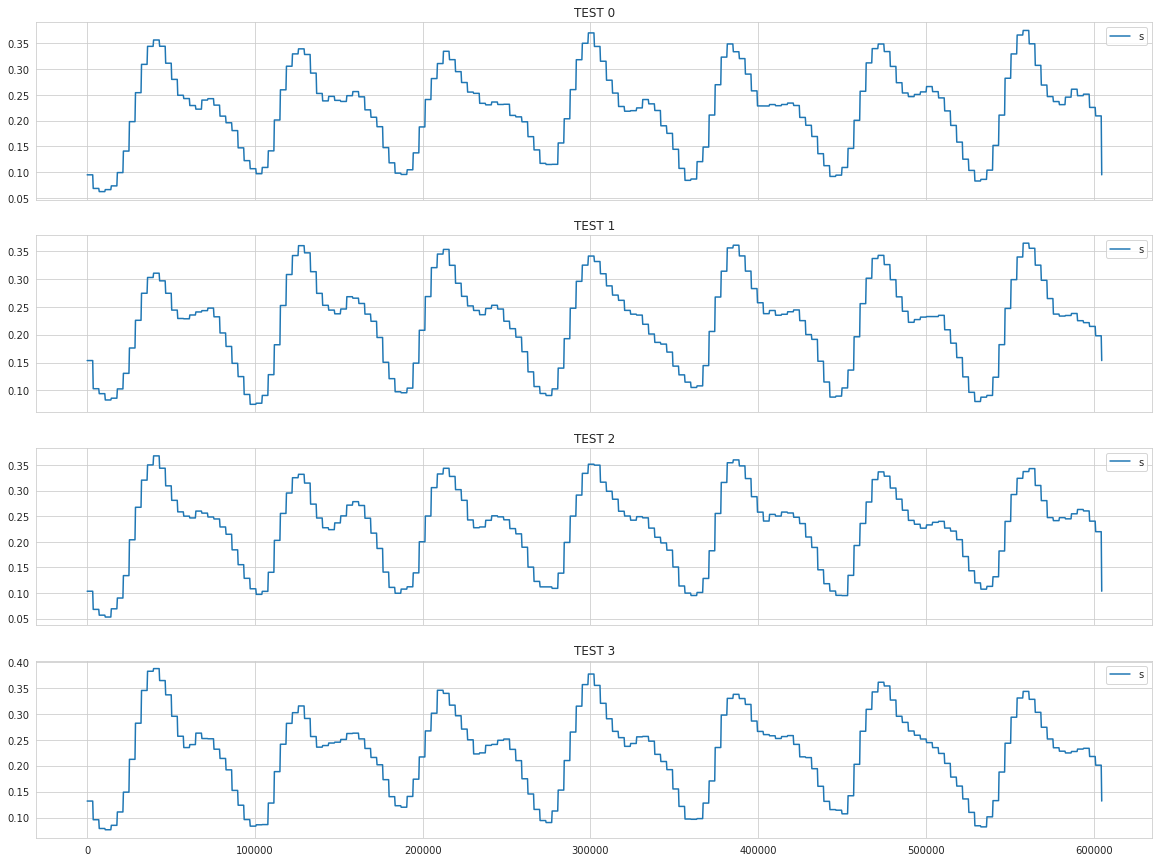

In [66]:
fig, axs = plt.subplots(4, 1, figsize=(20,15), sharex=True)

for seed in range(len(model)):
    xvalues = model[seed]['dataset']['timestamp']
    axs[seed].plot(xvalues, [model[seed]['dataset']['current_state'][i][3] for i in range(len(model[seed]['dataset']))])
    
    axs[seed].legend(('seed_' + str(seed)))
    axs[seed].set_title('TEST ' + str(seed))

## Introducing PLC readings: ground truth and altered data

In [67]:
# Loads PLCs data (works only with attacks, without attacks can raise some errors)
def load_saved_data(seed, folder, plcs):
    dfs_ground = []
    dfs_altered = []

    for plc in plcs:
        csv_ground_name = plc + '_ground-' + str(seed) + '.csv'
        dfs_ground.append(pd.read_csv(folder + csv_ground_name, header=[0, 1], index_col=0))
        
        if simulation_type == 'attacks':
            csv_altered_name = plc + '_altered-' + str(seed) + '.csv'
            dfs_altered.append(pd.read_csv(folder + csv_altered_name, header=[0, 1], index_col=0))

    df_ground = pd.concat(dfs_ground, axis=1)
    
    if simulation_type == 'attacks':
        df_altered = pd.concat(dfs_altered, axis=1)
        return df_ground, df_altered
    
    return df_ground, _

In [90]:
def normal_op_plot(series, var_groups, xvalues, titles, y_labels, legends=None, colors=None, test_file_name=None, 
                   xlim=None, linestyles=None, markers=None):
    sns.set_style("whitegrid")
    subplot_n_columns = 1
    subplot_n_rows = 3
    
    lines = ['solid', 'dashed']

    ticks = np.arange(0, 604800, step=86400)
    ticks_labels = ['Mon \n00:00', 'Tue \n00:00', 'Wed \n00:00', 'Thu \n00:00', 'Fri \n00:00', 'Sat \n00:00', 'Sun \n00:00']
    
    # Builds subplot grid
    f, axes = plt.subplots(subplot_n_rows,subplot_n_columns, figsize = (25, 18), squeeze=False, dpi=80, sharex=True)
    
    # sharex='all', sharey='all'
    
    subplot_row = 0
    subplot_column = 0
       
    for i, variables in enumerate(var_groups):
        for j, var in enumerate(variables):
            axes[subplot_row][subplot_column].plot(xvalues, series[var], label=legends[i][j], 
                                                   color=colors[i][j], linestyle=lines[j],
                                                   linewidth=2.5)
        
        if var != 'CUM_REWARD':
            axes[subplot_row][subplot_column].legend(loc='right') 
        
        axes[subplot_row][subplot_column].grid(True)
        axes[subplot_row][subplot_column].set_title(titles[i])
        #axes[subplot_row][subplot_column].set_xlabel('Iterations')
        axes[subplot_row][subplot_column].set_ylabel(y_labels[i])             

        axes[subplot_row][subplot_column].set_xticks(ticks)
        axes[subplot_row][subplot_column].set_xticklabels(ticks_labels)
        
        if xlim:
            axes[subplot_row][subplot_column].set_xlim(left=xlim[0], right=xlim[1])                    
            
        subplot_row = subplot_row + 1       
    
    if test_file_name is not None:
        plt.savefig(test_file_name+'.pdf', orientation='landscape')
    
    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 18}

    plt.rc('font', **font)    

In [91]:
def attacks_plot(series, var_groups, xvalues, titles, y_labels, legends=None, colors=None, 
                 test_file_name=None, xlim=None, linestyles=None, markers=None):
    sns.set_style("whitegrid")
    subplot_n_columns = 1
    subplot_n_rows = 4
    
    lines = ['solid', 'dashed']

    ticks = np.arange(0, 604800, step=86400)
    ticks_labels = ['Mon \n00:00', 'Tue \n00:00', 'Wed \n00:00', 'Thu \n00:00', 'Fri \n00:00', 'Sat \n00:00', 'Sun \n00:00']
    
    # Builds subplot grid
    f, axes = plt.subplots(subplot_n_rows,subplot_n_columns, figsize = (25,20), squeeze=False, dpi=80, sharex=True)
    
    # sharex='all', sharey='all'
    
    subplot_row = 0
    subplot_column = 0
       
    for i, variables in enumerate(var_groups):
        for j, var in enumerate(variables):
            axes[subplot_row][subplot_column].plot(xvalues, series[var], label=legends[i][j], 
                                                   color=colors[i][j], linestyle=lines[j],
                                                   linewidth=2.5)
        
        if var != 'CUM_REWARD':
            axes[subplot_row][subplot_column].legend(loc='right') 
        
        axes[subplot_row][subplot_column].grid(True)
        axes[subplot_row][subplot_column].set_title(titles[i])
        #axes[subplot_row][subplot_column].set_xlabel('Iterations')
        axes[subplot_row][subplot_column].set_ylabel(y_labels[i])             

        axes[subplot_row][subplot_column].set_xticks(ticks)
        axes[subplot_row][subplot_column].set_xticklabels(ticks_labels)
        
        if xlim:
            axes[subplot_row][subplot_column].set_xlim(left=xlim[0], right=xlim[1])   
            
        if i == 0:
            attacks_begin_line = [20000, 320600, 500000]
            attacks_end_line = [63200, 363800, 557600]
        elif i == 1:
            attacks_begin_line = [150000, 500000]
            attacks_end_line = [193200, 557600]
        else:
            attacks_begin_line = [150000, 20000, 320600, 500000]
            attacks_end_line = [193200, 63200, 363800, 557600]
            
        for x in range(len(attacks_begin_line)):
            axes[subplot_row][subplot_column].axvspan(
                attacks_begin_line[x],attacks_end_line[x], facecolor='lightgray', alpha=0.3)
        
        subplot_row = subplot_row + 1       
    
    if test_file_name is not None:
        plt.savefig(test_file_name+'.pdf', orientation='landscape')
    
    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 18}

    plt.rc('font', **font)    

In [92]:
seed = 0
simulation_folder = folder + 'good_90_eps_attacks/'
plcs = ['PLC2', 'PLC3']

df_ground, df_altered = load_saved_data(seed=seed, folder=simulation_folder, plcs=plcs)

# ------------------------------------------------

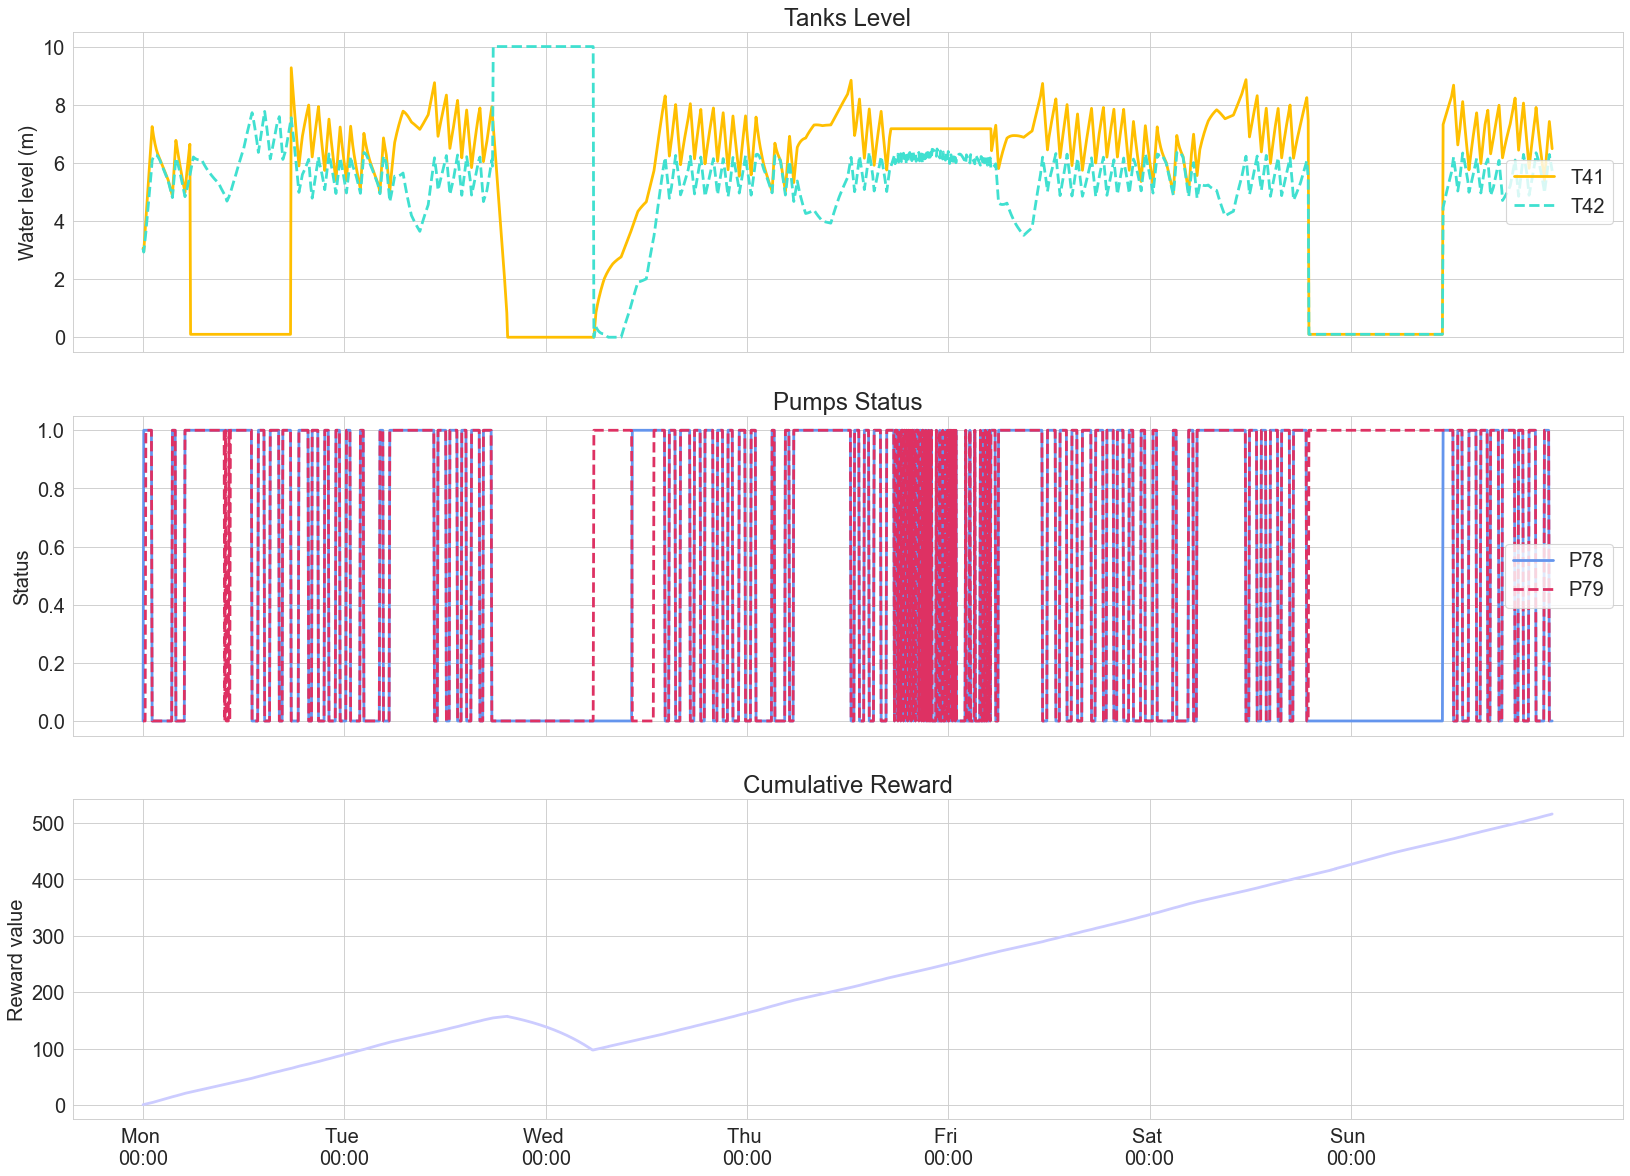

In [93]:
# TANKS
df = pd.DataFrame([model[seed]['dataset']['current_state'][i][0] for i in 
                   range(len(model[seed]['dataset']))], columns=['T41_LEVEL'])
df['T42_LEVEL'] = [model[seed]['dataset']['current_state'][i][1] for i in 
                   range(len(model[seed]['dataset']))]

# PUMPS
bin_actions = ['{0:0{width}b}'.format(action[0], width=2) for action 
               in model[seed]['dataset']['action']] 
p78 = [int(action[1]) for action in bin_actions]
p79 = [int(action[0]) for action in bin_actions]
df['P78_STATUS'] = p78
df['P79_STATUS'] = p79

# CUMULATIVE REWARD
rewards = model[seed]['dataset']['reward']
cum_reward_list = []
cum_reward = 0
for rew in rewards:
    cum_reward += rew
    cum_reward_list.append(cum_reward)
df['CUM_REWARD'] = cum_reward_list

# AXIS X
xvalues = model[seed]['dataset']['timestamp']

######################### ###############

# Saving manually 
save_pdf = True
save_as = "uninformed_normal3"

##########################################

var_groups  = [['T41_LEVEL', 'T42_LEVEL'], ['P78_STATUS', 'P79_STATUS'], ['CUM_REWARD']]
series = df
colors = [['#FFBF00', '#40E0D0'], ['#6495ED', '#DE3163'],  ['#CCCCFF']]
var_labels  = [['T41', 'T42'], ['P78', 'P79'], ['Reward']]
y_labels  = ['Water level (m)', 'Status', 'Reward value']

if save_pdf:
    file_name = save_as
else:
    file_name = None
    
titles = ['Tanks Level', 'Pumps Status', 'Cumulative Reward']
lines = ['solid', 'dashed']
makers = None
normal_op_plot(series, var_groups=var_groups, xvalues=xvalues, titles=titles, 
               y_labels=y_labels, legends=var_labels, colors=colors,
               test_file_name=file_name)

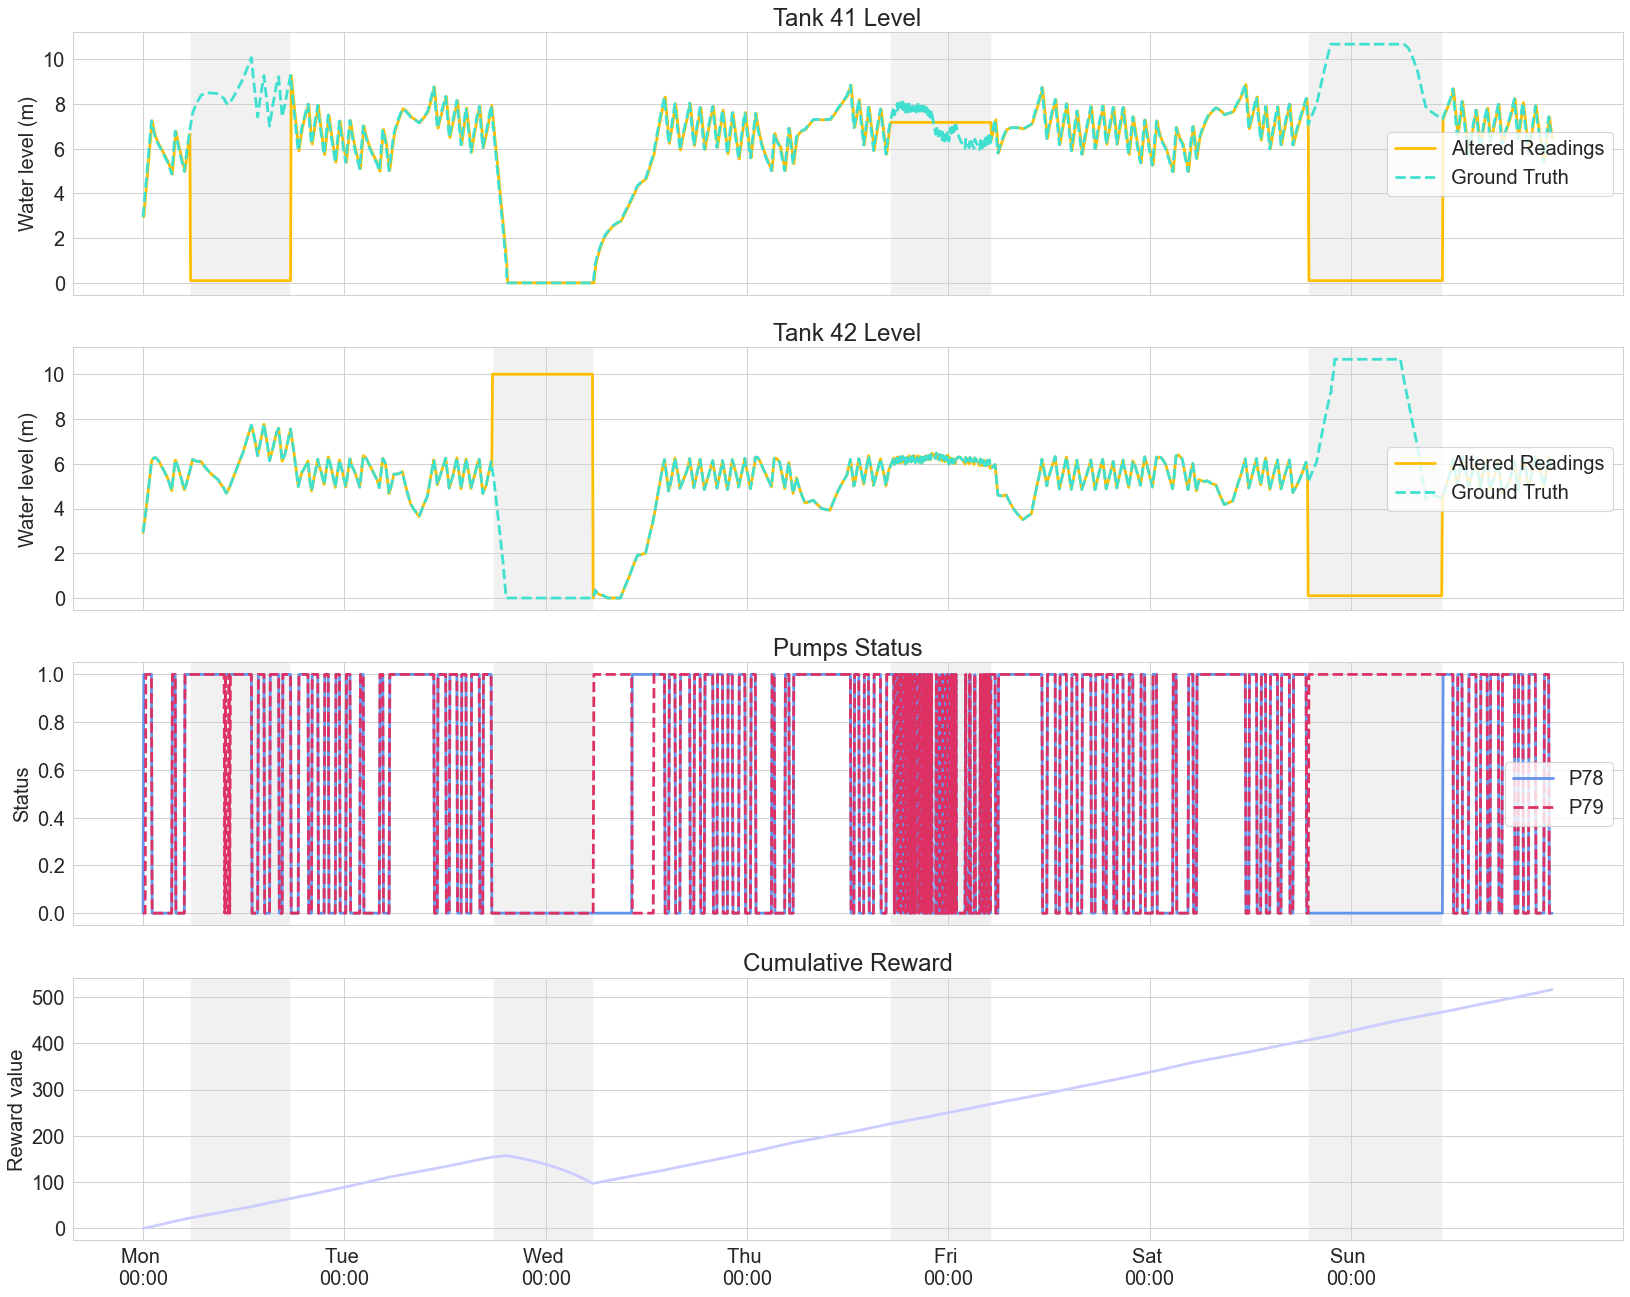

In [96]:
# TANKS
df = pd.DataFrame([model[seed]['dataset']['current_state'][i][0] for i in 
                   range(len(model[seed]['dataset']))], columns=['T41_LEVEL'])
df['T42_LEVEL'] = [model[seed]['dataset']['current_state'][i][1] for i in 
                   range(len(model[seed]['dataset']))]
# df['T42_LEVEL'] = df_altered[('T42', 'pressure')].values

# GROUND
df['T41_GROUND'] = df_ground[('T41', 'pressure')].values
df['T42_GROUND'] = df_ground[('T42', 'pressure')].values

# PUMPS
bin_actions = ['{0:0{width}b}'.format(action[0], width=2) for action 
               in model[seed]['dataset']['action']] 
p78 = [int(action[1]) for action in bin_actions]
p79 = [int(action[0]) for action in bin_actions]
df['P78_STATUS'] = p78
df['P79_STATUS'] = p79

# CUMULATIVE REWARD
rewards = model[seed]['dataset']['reward']
cum_reward_list = []
cum_reward = 0
for rew in rewards:
    cum_reward += rew
    cum_reward_list.append(cum_reward)
df['CUM_REWARD'] = cum_reward_list

# AXIS X
xvalues = model[seed]['dataset']['timestamp']

#########################################

# Saving manually 
#df['T42_LEVEL'][840 + 1] = df['T42_LEVEL'][842]
#df['T42_LEVEL'][312 + 1] = df['T42_LEVEL'][314]


save_pdf = False
save_as = "informed_attack3"

##########################################

var_groups  = [['T41_LEVEL', 'T41_GROUND'], ['T42_LEVEL', 'T42_GROUND'], ['P78_STATUS', 'P79_STATUS'], ['CUM_REWARD']]
series = df
colors = [['#FFBF00', '#40E0D0'], ['#FFBF00', '#40E0D0'], ['#6495ED', '#DE3163'],  ['#CCCCFF']]
var_labels  = [['Altered Readings', 'Ground Truth'], ['Altered Readings', 'Ground Truth'],
               ['P78', 'P79'], ['Reward']]
y_labels  = ['Water level (m)', 'Water level (m)', 'Status', 'Reward value']

if save_pdf:
    file_name = save_as
else:
    file_name = None
    
titles = ['Tank 41 Level', 'Tank 42 Level', 'Pumps Status', 'Cumulative Reward']
lines = ['solid', 'dashed']
makers = None

if simulation_type == 'attacks':
    attacks_plot(series, var_groups=var_groups, xvalues=xvalues, titles=titles, 
                   y_labels=y_labels, legends=var_labels, colors=colors,
                   test_file_name=file_name)

In [636]:
def attacks_plot(series, var_groups, titles, y_labels, legends=None, colors=None, 
                 test_file_name=None, xlim=None, linestyles=None, markers=None):
    sns.set_style("whitegrid")
    subplot_n_columns = 1
    subplot_n_rows = 4
    
    lines = ['solid', 'dashed']

    ticks = np.arange(0, 1008, step=144)
    ticks_labels = ['Mon \n00:00', 'Tue \n00:00', 'Wed \n00:00', 'Thu \n00:00', 'Fri \n00:00', 'Sat \n00:00', 'Sun \n00:00']
    
    # Builds subplot grid
    f, axes = plt.subplots(subplot_n_rows,subplot_n_columns, figsize = (20,18), squeeze=False, dpi=80, sharex=True)
    
    # sharex='all', sharey='all'
    
    subplot_row = 0
    subplot_column = 0
       
    for i, variables in enumerate(var_groups):
        for j, var in enumerate(variables):
            axes[subplot_row][subplot_column].plot(series[var], label=legends[i][j], 
                                                   color=colors[i][j], linestyle=lines[j],
                                                   linewidth=2.5)
        
        if var != 'CUM_REWARD':
            axes[subplot_row][subplot_column].legend(loc='right') 
        
        axes[subplot_row][subplot_column].grid(True)
        axes[subplot_row][subplot_column].set_title(titles[i])
        #axes[subplot_row][subplot_column].set_xlabel('Iterations')
        axes[subplot_row][subplot_column].set_ylabel(y_labels[i])             

        axes[subplot_row][subplot_column].set_xticks(ticks)
        axes[subplot_row][subplot_column].set_xticklabels(ticks_labels)
        
        if xlim:
            axes[subplot_row][subplot_column].set_xlim(left=xlim[0], right=xlim[1])   
            
        if i == 0:
            attacks_begin_line = [204, 732]
            attacks_end_line = [312, 840]
        elif i == 1:
            attacks_begin_line = [540, 732]
            attacks_end_line = [648, 840]
        else:
            attacks_begin_line = [204, 540, 732]
            attacks_end_line = [312, 648, 840]
            
        for x in range(len(attacks_begin_line)):
            axes[subplot_row][subplot_column].axvspan(
                attacks_begin_line[x],attacks_end_line[x], facecolor='lightgray', alpha=0.3)
        
        subplot_row = subplot_row + 1       
    
    if test_file_name is not None:
        plt.savefig(test_file_name+'.pdf', orientation='landscape')
    
    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 18}

    plt.rc('font', **font)    

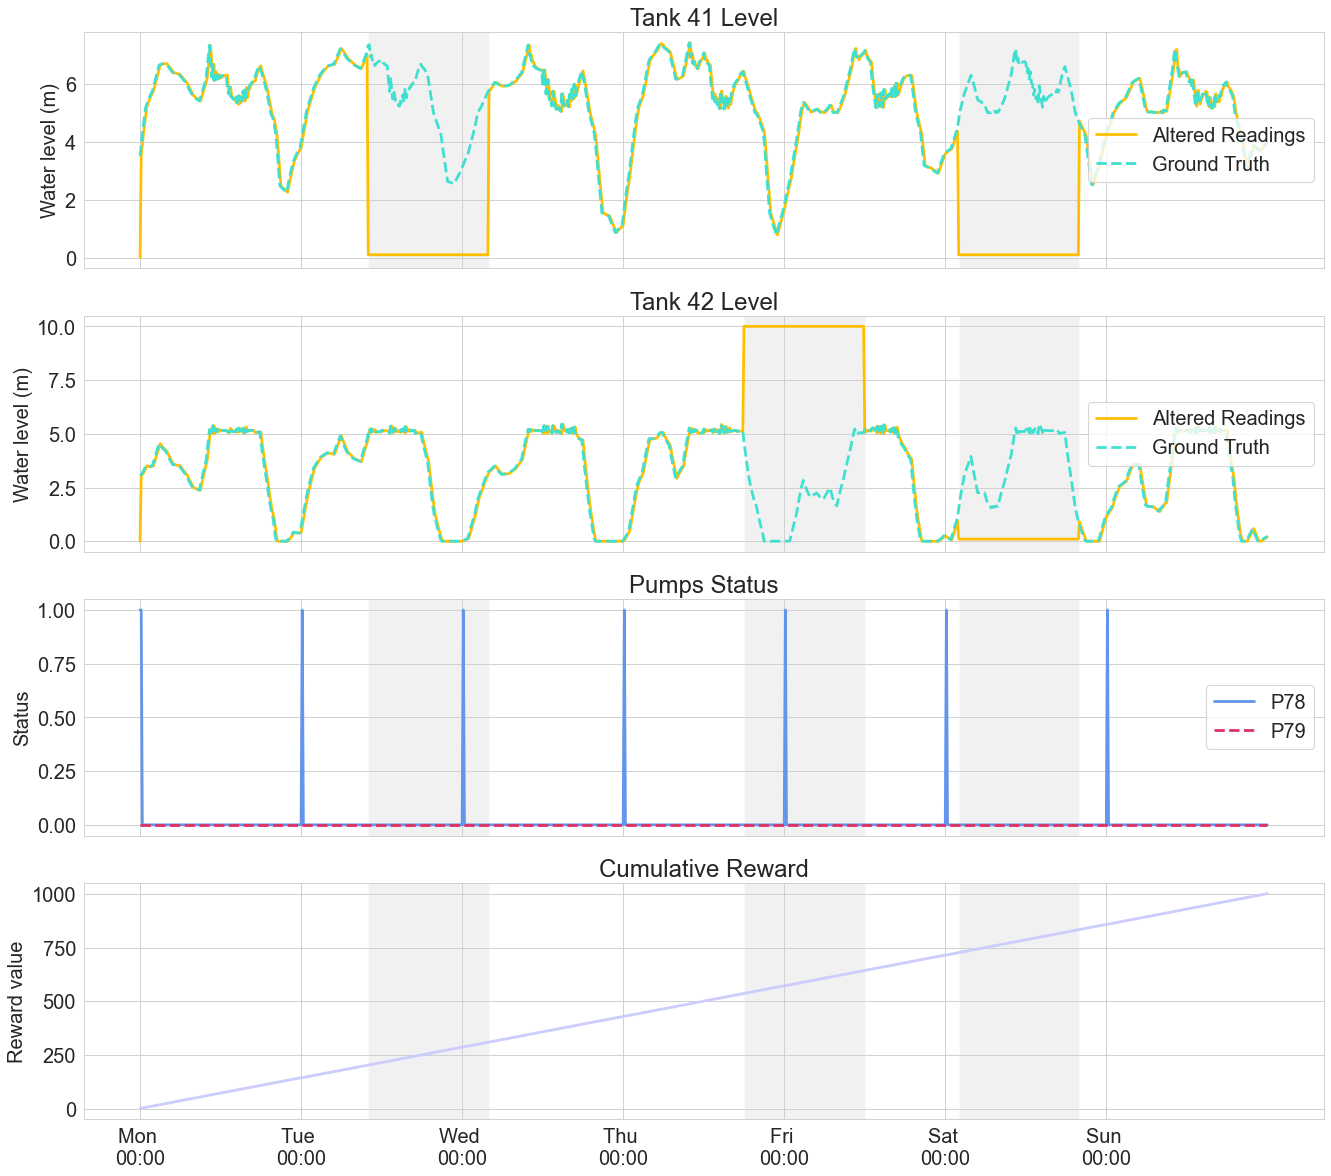

In [640]:
seed = 2

# TANKS
df = pd.DataFrame([model[seed]['dataset']['current_state'][i][2] for i in 
                   range(len(model[seed]['dataset']))], columns=['T41_LEVEL'])
df['T42_LEVEL'] = [model[seed]['dataset']['current_state'][i][3] for i in 
                   range(len(model[seed]['dataset']))]

# GROUND
#ground_truth_csv = ground_truth_dir + '/ground_truth' + str(seed) + '.csv'
#df_ground = pd.read_csv(ground_truth_csv)
#df['T41_GROUND'] = df_ground["T41_LEVEL"]
#df['T42_GROUND'] = df_ground["T42_LEVEL"]

df['T41_GROUND'] = model[seed]["T41_ground"][1:]
df['T42_GROUND'] = model[seed]["T42_ground"][1:]

# PUMPS
bin_actions = ['{0:0{width}b}'.format(action[0], width=2) for action 
               in model[seed]['dataset']['action']] 
p78 = [int(action[1]) for action in bin_actions]
p79 = [int(action[0]) for action in bin_actions]
df['P78_STATUS'] = p78
df['P79_STATUS'] = p79

# CUMULATIVE REWARD
rewards = model[seed]['dataset']['reward']
cum_reward_list = []
cum_reward = 0
for rew in rewards:
    cum_reward += rew
    cum_reward_list.append(cum_reward)
df['CUM_REWARD'] = cum_reward_list

######################### ###############

# Saving manually 
#df['T42_LEVEL'][840 + 1] = df['T42_LEVEL'][842]
#df['T42_LEVEL'][312 + 1] = df['T42_LEVEL'][314]


save_pdf = False
save_as = "informed_attack3"

##########################################

var_groups  = [['T41_LEVEL', 'T41_GROUND'], ['T42_LEVEL', 'T42_GROUND'], ['P78_STATUS', 'P79_STATUS'], ['CUM_REWARD']]
series = df
colors = [['#FFBF00', '#40E0D0'], ['#FFBF00', '#40E0D0'], ['#6495ED', '#DE3163'],  ['#CCCCFF']]
var_labels  = [['Altered Readings', 'Ground Truth'], ['Altered Readings', 'Ground Truth'],
               ['P78', 'P79'], ['Reward']]
y_labels  = ['Water level (m)', 'Water level (m)', 'Status', 'Reward value']

if save_pdf:
    file_name = save_as
else:
    file_name = None
    
titles = ['Tank 41 Level', 'Tank 42 Level', 'Pumps Status', 'Cumulative Reward']
lines = ['solid', 'dashed']
makers = None
attacks_plot(series, var_groups=var_groups, titles=titles, 
               y_labels=y_labels, legends=var_labels, colors=colors,
               test_file_name=file_name)

In [577]:
df[]

[0,
 3.939971284701984,
 4.799379729914509,
 5.630281049489005,
 6.331461533109716,
 7.011118733361833,
 7.670329848851958,
 8.307805535010836,
 8.92675339931022,
 8.928131326023824,
 8.623297142811511,
 8.382332398691968,
 8.205169657672466,
 7.9918803767578614,
 7.968151940715946,
 8.063663176121493,
 8.064691661312448,
 8.092971209961767,
 8.097710293700015,
 8.111486469895464,
 8.049627147497079,
 8.035234533418535,
 8.023823379437076,
 8.020774198062998,
 8.018409087825383,
 8.026429817833641,
 7.992778769457869,
 7.987593827609703,
 7.983736048883688,
 7.983087532767307,
 7.982616215678072,
 7.958520666471527,
 8.03144633167963,
 8.033875643935852,
 8.05159686230555,
 8.05507478453902,
 8.059096811740659,
 8.064633585207512,
 8.041657221811862,
 8.03637948378362,
 8.032187527925883,
 8.029983677305157,
 8.029439577959174,
 8.039255677444842,
 7.995696816149624,
 7.9887450002394695,
 7.983548543601285,
 7.983054436783366,
 7.9814892575757,
 7.970304778560071,
 8.003952543913844,
 